In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [130]:
# Firstly, read all the data
df = pd.read_csv("A2-bank/bank-additional-full.csv", delimiter=";")
df_preprocessed = df.copy()
print(df.shape)

(41188, 21)


In [131]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


As we can see from the above, there are only 8 fully numeric values, values of others are mostly strings. We need to convert them to numbers. Also, it's important to consider missing values and what to do with them. Let's firstly check how many of missing value there are in the dataset

In [132]:
np.sum(df == "unknown", axis=0)

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [133]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Firstly, replacing months and days in numbers

In [134]:
months_mapping = {calendar.month_abbr[i].lower(): i for i in range(1, 13)}
df_preprocessed["month"] = df["month"].apply(lambda mon: months_mapping[mon])

In [135]:
days_mapping = {calendar.day_abbr[i].lower(): i for i in range(7)}
df_preprocessed["day_of_week"] = df["day_of_week"].apply(lambda day: days_mapping[day])

In [136]:
df["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

For the job, we could introduce a one-hot encoding, as we have only 12 jobs. However, this would add 11 more fields to the dataset, and models would have to be retrained when a person with a different kind of job comes. Here I try to subjectively represent this data by "sorting" the jobs based on average salaries. We could use some API for getting this if it was not just an assignment

In [137]:
jobs_mapping = {
    "unemployed": 0,
    "unknown": 0,
    "student": 0,
    "housemaid": 1,
    "retired": 2,
    "services": 3,
    "blue-collar": 4,
    "technician": 5,
    "admin.": 6,
    "self-employed": 7,
    "management": 8,
    "entrepreneur": 9
}
df_preprocessed["job"] = df["job"].apply(lambda x: jobs_mapping[x])

With "marital" we have only 4 columns that are not well representable by numbers, so let's introduce a one-hot encoding for it. This also gives a convenient way to represent an "unknown" value - as neither of values

In [138]:
df_preprocessed["marital_married"] = (df["marital"] == "married").astype(int)
df_preprocessed["marital_single"] = (df["marital"] == "single").astype(int)
df_preprocessed["marital_divorced"] = (df["marital"] == "divorced").astype(int)
df_preprocessed = df_preprocessed.drop("marital", axis=1)

In [139]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [140]:
df_preprocessed["y"] = df["y"].map(lambda y: 1 if y == "yes" else 0)
df_preprocessed["y"].sum()

4640

In [141]:
df["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

Education field can also be represented by numbers. There are many unknown values that should be treated right. In this case, I will just assign them to the median - the same as basic.9y

In [142]:
education_mapping = {
    "illiterate": 0,
    "basic.4y": 1,
    "basic.6y": 2,
    "basic.9y": 3,
    "high.school": 4,
    "professional.course": 5,
    "university.degree": 6,
    "unknown": 3
}
df_preprocessed["education"] = df["education"].map(lambda education: education_mapping[education])

In [143]:
df["default"].unique()

array(['no', 'unknown', 'yes'], dtype=object)

"default" field has only "yes", "no" and "unknown" field. To keep it simple and logical, I will replace "unknown" field with a value in between yes and no. It could be possible to replace it with probability of it being "no" or "yes" learned from other data or so. But in this case, setting that probability to 0.5 should be enough. The same thing I do with "housing" and "loan" fields

In [144]:
yes_no_mapping = {
    "no": 0,
    "yes": 1,
    "unknown": 0.5
}
df_preprocessed["default"] = df["default"].map(lambda x: yes_no_mapping[x])
df_preprocessed["loan"] = df["loan"].map(lambda x: yes_no_mapping[x])
df_preprocessed["housing"] = df["housing"].map(lambda x: yes_no_mapping[x])

Very similar I do with the last "poutcome" value, just values are different

In [148]:
outcome_map = {
    "failure": 0,
    "success": 1,
    "nonexistent": 0.5
}
df_preprocessed["poutcome"] = df["poutcome"].map(lambda x: outcome_map[x])

The "contact" field consists of only two possible values, so there is no need for one-hot encoding for it. We can just use mapping to 0 and 1

In [145]:
df_preprocessed["contact"] = df["contact"].map(lambda contact: 1 if contact == "telephone" else 0)

In [149]:
df_preprocessed.head()

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_married,marital_single,marital_divorced
0,56,1,1,0.0,0.0,0.0,1,5,0,261,...,0.5,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0
1,57,3,4,0.5,0.0,0.0,1,5,0,149,...,0.5,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0
2,37,3,4,0.0,1.0,0.0,1,5,0,226,...,0.5,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0
3,40,6,2,0.0,0.0,0.0,1,5,0,151,...,0.5,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0
4,56,3,4,0.0,0.0,1.0,1,5,0,307,...,0.5,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0


In [150]:
df_preprocessed.describe()

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_married,marital_single,marital_divorced
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,4.761411,4.112144,0.104436,0.535860,0.163713,0.365252,6.607896,1.979581,258.285010,...,0.465051,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654,0.605225,0.280859,0.111974
std,10.42125,2.069626,1.620913,0.203343,0.492657,0.361808,0.481507,2.040998,1.411514,259.279249,...,0.181443,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173,0.488808,0.449424,0.315339
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,102.000000,...,0.500000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,6.000000,2.000000,180.000000,...,0.500000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,6.000000,6.000000,0.000000,1.000000,0.000000,1.000000,8.000000,3.000000,319.000000,...,0.500000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,1.000000,1.000000,0.000000
max,98.00000,9.000000,6.000000,1.000000,1.000000,1.000000,1.000000,12.000000,4.000000,4918.000000,...,1.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,1.000000,1.000000,1.000000


### Now we need to normalize all the data

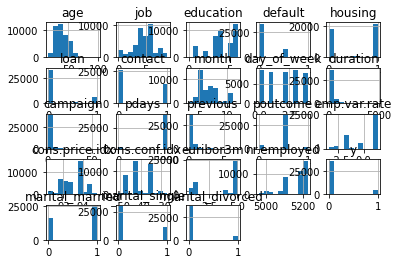

In [158]:
df_preprocessed.hist()
pass

Looks like we can use standartization for the "age" field to avoid that long tail on the right, and otherwise simple normalization should work fine

In [159]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [166]:
std_scaler = StandardScaler()
df_scaled = df_preprocessed.copy()
df_scaled["age"] = std_scaler.fit_transform(df_preprocessed[["age"]])

In [185]:
mm_scaler = MinMaxScaler()
columns_to_scale = list(df_scaled.columns)
columns_to_scale.remove("age")
df_scaled[columns_to_scale] = mm_scaler.fit_transform(df_preprocessed[columns_to_scale])

In [187]:
df_scaled.describe()

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_married,marital_single,marital_divorced
count,4.118800e+04,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,-1.880382e-16,0.529046,0.685357,0.104436,0.535860,0.163713,0.365252,0.400877,0.494895,0.052518,...,0.465051,0.725393,0.535723,0.430854,0.677237,0.769134,0.112654,0.605225,0.280859,0.111974
std,1.000012e+00,0.229958,0.270152,0.203343,0.492657,0.361808,0.481507,0.226778,0.352879,0.052720,...,0.181443,0.327283,0.225581,0.193648,0.393210,0.273163,0.316173,0.488808,0.449424,0.315339
min,-2.209365e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.699804e-01,0.444444,0.500000,0.000000,0.000000,0.000000,0.000000,0.222222,0.250000,0.020740,...,0.500000,0.333333,0.340608,0.338912,0.160961,0.512287,0.000000,0.000000,0.000000,0.000000
50%,-1.942267e-01,0.555556,0.666667,0.000000,1.000000,0.000000,0.000000,0.333333,0.500000,0.036600,...,0.500000,0.937500,0.603274,0.376569,0.957379,0.859735,0.000000,1.000000,0.000000,0.000000
75%,6.694038e-01,0.666667,1.000000,0.000000,1.000000,0.000000,1.000000,0.555556,0.750000,0.064864,...,0.500000,1.000000,0.698753,0.602510,0.980957,1.000000,0.000000,1.000000,1.000000,0.000000
max,5.563310e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [189]:
df_scaled.to_csv("A2-bank/bank-full-preprocessed.csv", index=False)